In [ ]:
%load_ext autoreload
%autoreload 2

import pickle
import surrogates
import torch
import custom_loss
import numpy as np

batch_size = 1000
learning_rate = 0.001

file_open = open("Archive/pickles/export/model005_rev2.pickle", "rb")
model005 = pickle.load(file_open)
file_open.close()

training_data = surrogates.dir_to_dataset_list("Archive/LIGHTbeams/Trial0_Training_Data/training/240605")
test_data = surrogates.dir_to_dataset_list("Archive/LIGHTbeams/Trial0_Training_Data/test/240614_xy_divergence", [9.999999993673508e-13, 9.999999993673508e-13, 9.999999993673508e-13, 8909239.51048443, 8896262.343198072, 64026263.69728826, 14.999999999999854], [0.07125033558156368, 0.07125340889245838, 2.61519447482496e-08, 10878660.62616183, 10780162.546653992, 64027582.0133755, 14.994999999999788])

train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

test_error_list = surrogates.ErrorList("Archive/240613_model_tuning/model005/starting_data/model005_rev2_errors_5x16_eps.npy")

loss_fn = custom_loss.WMSELoss()
loss_fn.weight = torch.tensor([0.4537, 0.5610, 0.4379, 0.7643, 0.4790, 1.0000])


In [ ]:

surrogates.train_existing_model(model=model005, train_dataloader=train_dataloader, test_dataloader=test_dataloader, 
                                loss_fn=loss_fn, error_class=test_error_list, epochs=2, epochs_epochs=2, 
                                lr=learning_rate, bs=batch_size)



In [512]:
%load_ext autoreload
%autoreload 2

import pickle
import surrogates
import torch
from torch import nn
import custom_loss
import numpy as np
import datasets
import surrogates_000

batch_size = 1000
learning_rate = 1e-3

in_mean = [5.361699624411882e-06, 2.8099847552459577e-06, -103.46455517652929, -54.22419067092724, 31384166.415799182, 7.5488486842097995]
out_mean = [1.2208464887686063e-06, 6.857339420669208e-06, 88.5449769771143, 580.5235916625553]
in_std = [0.013987608190429593, 0.01398283932581212, 874752.0124925484, 874453.7368016029, 10528205.536358843, 4.366550900490813]
out_std = [0.02555778670122864, 0.025553795813075042, 2215196.2727785874, 2214642.635136461]

transverse_training_data = datasets.dir_to_tdataset_list_nc("Archive/optimization", in_mean, out_mean, in_std, out_std)
#transverse_test_data = datasets.dir_to_tdataset_list("Archive/LIGHTbeams/Trial1/test/240727")

transverse_training_dataloader = torch.utils.data.DataLoader(transverse_training_data, batch_size=batch_size, shuffle=True)
#transverse_test_dataloader = torch.utils.data.DataLoader(transverse_test_data, batch_size=batch_size, shuffle=True)

#loss_fn = nn.MSELoss()
#model = surrogates_000.TSolenoidSurrogate()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Not a .npy file: untitled folder
Not a .npy file: .DS_Store
Total particle count: 5000
Working on file # 0
Not a .npy file: untitled folder
Not a .npy file: .DS_Store
Creating dataset object.
[[-1.29721124e-04  1.98838576e-04  5.36582897e-04 ... -4.45574089e-04
   1.31531317e-04 -4.56448725e-04]
 [-1.76232652e-05 -1.14250418e-04  1.40068956e-04 ... -1.91248354e-04
   5.59624220e-04  2.94775893e-04]
 [-1.29721124e+06  1.98838576e+06  5.36582897e+06 ... -4.45574089e+06
   1.31531317e+06 -4.56448725e+06]
 [-1.76232652e+05 -1.14250418e+06  1.40068956e+06 ... -1.91248354e+06
   5.59624220e+06  2.94775893e+06]
 [ 4.43995438e+07  4.24623358e+07  4.40433052e+07 ...  4.31804124e+07
   4.32463914e+07  4.42592887e+07]
 [ 1.07600000e+01  1.07600000e+01  1.07600000e+01 ...  1.07600000e+01
   1.07600000e+01  1.07600000e+01]]
In und out arrays fertig.
Mean und STD Berechnung fertig. For loops kommen.
For Loop 1 fe

In [51]:
print(transverse_training_data.__getitem__(100))

(tensor([ 6.6671e-03,  3.4304e-03, -3.6382e-13, -1.8720e-13,  4.0296e+07,
         1.3180e+01]), tensor([-1.2053e-03,  2.4551e-02, -1.8298e+05,  3.4492e+06]))


In [513]:
import pickle

file = open("Archive/pickles/export/shard_tedata_optimization.pickle", "wb")
pickle.dump(transverse_training_data, file)
file.close()

In [ ]:
%load_ext autoreload
%autoreload 2

import surrogates
import datasets

datasets.divide_and_shuffle("Archive/LIGHTbeams/Trial1/training/raw_data/240815", "Archive/LIGHTbeams/Trial1/training/shards",11000000)

In [ ]:
import pickle
import torch

file_open = open("/notebooks/model_007_rev1.pickle", "rb")
error_model = pickle.load(file_open)
file_open.close()

error_model.to("cpu")

file = open("/notebooks/model_007_rev1_cpu.pickle", "wb")
pickle.dump(transverse_training_data, file)
file.close()

In [ ]:
import pickle
import torch
import datasets
import surrogates_000

%load_ext autoreload
%autoreload 2


batch_size = 1

file_open = open("Archive/pickles/models/model_009_ep54_cpu.pickle", "rb")
error_model = pickle.load(file_open)
file_open.close()

print("model loaded")

file_open = open("Archive/pickles/export/shard_tedata_trial1.pickle", "rb")
error_test_data = pickle.load(file_open)
file_open.close()

print("test data loaded")

error_test_dataloader = torch.utils.data.DataLoader(error_test_data, batch_size=batch_size, shuffle=True)

print("starting with error computation")

error_mean_array = datasets.tr_mean_max_error(error_model, error_test_dataloader)

In [4]:
import time

#indx = 9
#indx = 48
#indx = 340
#indx = 518
#indx = 4
indx = 192

print(error_test_data.__getitem__(indx)[0])
print(error_test_data.__getitem__(indx)[1])
print(error_model(error_test_data.__getitem__(indx)[0]))

#for indx in range(3300000):
#    time.sleep(0.1)
#    print(indx)
#    print((error_model(error_test_data.__getitem__(indx)[0])[2]-error_test_data.__getitem__(indx)[1][2])#/error_test_data.__getitem__(indx)[1][2])

tensor([ 7.1400e-01,  2.7051e+00, -5.4131e-04,  2.4308e-04,  2.6373e+00,
        -3.4153e-01])
tensor([ 3.9070e-01,  1.4835e+00, -2.3940e-05,  3.9538e-04])
tensor([ 3.8425e-01,  1.4794e+00, -6.2446e-03,  2.2108e-04],
       grad_fn=<ViewBackward0>)


In [3]:
error_model(error_test_data.__getitem__(indx)[0][0])

RuntimeError: ArrayRef: invalid index Index = 18446744073709551615; Length = 0

In [ ]:
print(error_test_data.in_mean_list)

In [ ]:
file_open = open("Archive/pickles/export/model006_trdata.pickle", "rb")
transverse_training_data = pickle.load(file_open)
file_open.close()

transverse_training_dataloader = torch.utils.data.DataLoader(transverse_training_data, batch_size=batch_size, shuffle=True)

In [ ]:
datasets.train_existing_model(model=model, train_dataloader=transverse_training_dataloader,test_dataloader=transverse_test_dataloader, loss_fn=loss_fn, error_class=test_error_list, epochs=2, epochs_epochs=5, lr=learning_rate, bs=batch_size)

In [ ]:
datasets.train_existing_model(model=model, train_dataloader=transverse_training_dataloader,test_dataloader=transverse_test_dataloader, loss_fn=loss_fn, error_class=test_error_list, epochs=2, epochs_epochs=5, lr=1e-7, bs=batch_size)

In [ ]:

zahl = 430000

sum_x = 0
sum_y = 0
sum_px = 0
sum_py = 0

for x, y in transverse_training_data:
    diff = y-model(x)
    quot= abs(diff/y)
    print(quot[0])

#print(model(transverse_test_data.__getitem__(zahl)[0]))

In [ ]:

for i in range(transverse_test_data.__len__()):
    print(i)
    #print(transverse_test_data.__getitem__(i)[1])
    #print(model(transverse_test_data.__getitem__(i)[0]))
    tempor = abs((transverse_test_data.__getitem__(i)[1]-model(transverse_test_data.__getitem__(i)[0]))/transverse_test_data.__getitem__(i)[1])
    print(tempor[0])



In [6]:
import numpy as np

t = 6*1e-9
div_start = -1
div_stop = 1
div_steps = 10
div_step_size = abs((div_stop-div_start)/div_steps)

step_vector = np.arange(div_start+div_step_size, div_stop + div_step_size, div_step_size)

print(step_vector)

[-8.00000000e-01 -6.00000000e-01 -4.00000000e-01 -2.00000000e-01
 -2.22044605e-16  2.00000000e-01  4.00000000e-01  6.00000000e-01
  8.00000000e-01  1.00000000e+00]


In [ ]:
backup_error_list = surrogates.ErrorList("Archive/240613_model_tuning/model005/starting_data/model005_rev2_errors_5x16_eps.npy")

In [ ]:
backup_error_list.add_plot_points("Archive/240613_model_tuning/model005/starting_data/model005_rev5_error_list.npy")

In [ ]:
backup_error_list.add_plot_points("Archive/240613_model_tuning/model005/starting_data/model005_rev6_error_list.npy")

In [ ]:
backup_error_list.add_plot_points("Archive/240613_model_tuning/model005/starting_data/model005_rev7_error_list.npy")

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)
%config InlineBackend.figure_format = 'retina'

backup_error_list.plot_pos_accuracy()

In [ ]:
backup_error_list.plot_mom_accuracy()

In [15]:
import numpy as np
import torch

test_array = torch.from_numpy(np.load("Archive/optimization/1000p2_22mev140mrad12kA_optimization.npy")[:,:6,0])
test_array.requires_grad_(True)

x_vector = test_array[:,0]
y_vector = test_array[:,1]
vx_vector = test_array[:, 3]
vy_vector = test_array[:,4]


done_array = torch.transpose(torch.stack([x_vector, y_vector, vx_vector, vy_vector]), 0, 1)


print(torch.stack(done_array))

TypeError: stack(): argument 'tensors' (position 1) must be tuple of Tensors, not Tensor

In [84]:
%load_ext autoreload
%autoreload 2

import suropt
test_beam = None
test_surrogate = None
test_drift = None

test_beam = suropt.SurrogateBeam("Archive/optimization/1000p9_11mev140mrad12kA_optimization.npy")

test_surrogate = suropt.SolenoidSurrogate("Archive/pickles/models/model_009_ep81_cpu.pickle", 0.5)

test_drift = suropt.DriftSection(1, 1000)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
import torch

input_current = torch.tensor(4, requires_grad=True, dtype=torch.float32)


test_surrogate.propagate_beam(test_beam, input_current)

In [86]:
#test_drift.propagate_beam(test_beam)

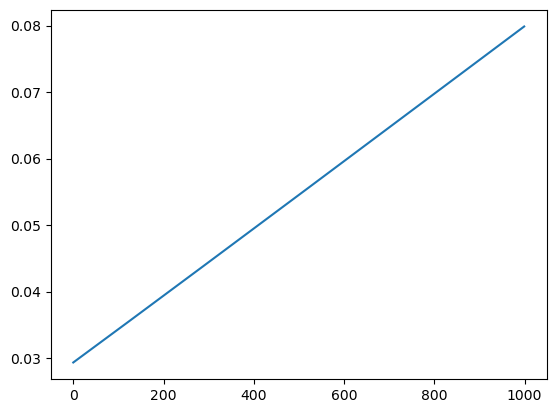

In [87]:
import matplotlib as mlp

import matplotlib.pyplot as plt

plt.plot(test_surrogate.x_list)



In [35]:
import numpy as np
import torch
import pickle

surr_length = 0.5
current = 9.7

in_mean = [5.361699624411882e-06, 2.8099847552459577e-06, -103.46455517652929, -54.22419067092724, 31384166.415799182, 7.5488486842097995]

out_mean = [1.2208464887686063e-06, 6.857339420669208e-06, 88.5449769771143, 580.5235916625553]

in_std = [0.013987608190429593, 0.01398283932581212, 874752.0124925484, 874453.7368016029, 10528205.536358843, 4.366550900490813]

out_std = [0.02555778670122864, 0.025553795813075042, 2215196.2727785874, 2214642.635136461]

test_beam = np.load("Archive/LIGHTbeams/Trial1/training/shards/11000000p_0.npy")


class TransverseParticleDataset(torch.utils.data.Dataset):

    def __init__(self, beam):

        in_mean = [5.361699624411882e-06, 2.8099847552459577e-06, -103.46455517652929, -54.22419067092724, 31384166.415799182, 7.5488486842097995]

        in_std = [0.013987608190429593, 0.01398283932581212, 874752.0124925484, 874453.7368016029, 10528205.536358843, 4.366550900490813]

        x_vector = (beam[:, 0,0] - in_mean[0]) / in_std[0]
        y_vector = (beam[:, 1,0] - in_mean[1]) / in_std[1]
        z_vector = beam[:, 2,0]
        v_x_vector = (beam[:, 3,0] - in_mean[2]) / in_std[2]
        v_y_vector = (beam[:, 4,0] - in_mean[3]) / in_std[3]
        v_z_vector = (beam[:, 5,0] - in_mean[4]) / in_std[4]
        current_temp = (current - in_mean[5]) / in_std[5]
        current_in = np.ones(len(x_vector)) * current_temp
        self.input_tensor = np.array([x_vector, y_vector, v_x_vector, v_y_vector, v_z_vector, current_in])

    def __getitem__(self, idx):

        in_particle = torch.from_numpy(self.input_tensor[:, idx])

        return in_particle.float()

    def __len__(self):
        return len(self.input_tensor[0])
    
    

input_data = TransverseParticleDataset(test_beam)
input_dataloader = torch.utils.data.DataLoader(input_data, batch_size=500, shuffle=False)

data_iter = iter(input_dataloader)
input_batch = next(data_iter)
input_batch.requires_grad_(False)

file = open("Archive/pickles/models/model_009_ep81_cpu.pickle", "rb")
model = pickle.load(file)
file.close()
model.requires_grad_(False)
print(input_batch)

tensor([[ 4.0121e-01, -9.3491e-01,  1.1828e-04,  6.2009e-05, -1.0750e+00,
          4.9264e-01],
        [ 2.1851e-01,  1.0139e+00,  1.1828e-04,  6.2009e-05, -7.3770e-01,
          4.9264e-01],
        [-1.4461e+00, -7.6127e-01,  7.3988e-01,  3.8949e-01,  6.2319e-01,
          4.9264e-01],
        ...,
        [ 1.1750e+00,  9.2269e-01,  1.1828e-04,  6.2009e-05,  1.1548e-01,
          4.9264e-01],
        [ 8.3778e-01, -1.3108e-01,  1.1828e-04,  6.2009e-05, -1.0115e+00,
          4.9264e-01],
        [-1.6759e+00, -7.0090e-01,  1.1828e-04,  6.2009e-05,  7.6451e-01,
          4.9264e-01]])


In [510]:
import numpy as np
import torch
import pickle

surr_length = 0.5
current = 9.5

in_mean = [5.361699624411882e-06, 2.8099847552459577e-06, -103.46455517652929, -54.22419067092724, 31384166.415799182, 7.5488486842097995]

out_mean = [1.2208464887686063e-06, 6.857339420669208e-06, 88.5449769771143, 580.5235916625553]

in_std = [0.013987608190429593, 0.01398283932581212, 874752.0124925484, 874453.7368016029, 10528205.536358843, 4.366550900490813]

out_std = [0.02555778670122864, 0.025553795813075042, 2215196.2727785874, 2214642.635136461]


test_beam = np.load("Archive/optimization/5000p2_22mev140mrad10_76kA_training_h2.npy")

class TransverseParticleDataset(torch.utils.data.Dataset):

    def __init__(self, beam):

        in_mean = [5.361699624411882e-06, 2.8099847552459577e-06, -103.46455517652929, -54.22419067092724, 31384166.415799182, 7.5488486842097995]

        in_std = [0.013987608190429593, 0.01398283932581212, 874752.0124925484, 874453.7368016029, 10528205.536358843, 4.366550900490813]

        x_vector = (beam[:, 0,0] - in_mean[0]) / in_std[0]
        y_vector = (beam[:, 1,0] - in_mean[1]) / in_std[1]
        z_vector = beam[:, 2,0]
        v_x_vector = (beam[:, 3,0] - in_mean[2]) / in_std[2]
        v_y_vector = (beam[:, 4,0] - in_mean[3]) / in_std[3]
        v_z_vector = (beam[:, 5,0] - in_mean[4]) / in_std[4]
        current_in = ((np.ones(len(x_vector)) * current) - in_mean[5]) / in_std[5]
        self.input_tensor = np.array([x_vector, y_vector, v_x_vector, v_y_vector, v_z_vector, current_in])
        
    def __getitem__(self, idx):

        in_particle = torch.from_numpy(self.input_tensor[:, idx])

        return in_particle.float()

    def __len__(self):
        return len(self.input_tensor[0])
    
    

input_data = TransverseParticleDataset(test_beam)
input_dataloader = torch.utils.data.DataLoader(input_data, batch_size=5000, shuffle=False)

data_iter = iter(input_dataloader)
input_batch = next(data_iter)
input_batch.requires_grad_(False)

file = open("Archive/pickles/models/model_009_ep81_cpu.pickle", "rb")
model = pickle.load(file)
file.close()
model.requires_grad_(False)
out_tensor = model(input_batch) 

numpy_output = out_tensor.detach().numpy()

filtered_numpy_output = np.array([numpy_output[0]])

v_z_vector_temp = input_batch[:, 4].detach().numpy()

v_z_filtered = np.array([v_z_vector_temp[0]])

for count, particle in enumerate(numpy_output):
    
    if np.sqrt(particle[0]**2 + particle[1]**2) < np.sqrt(1):
        filtered_numpy_output = np.append(filtered_numpy_output, [particle], axis=0)
        v_z_filtered = np.append(v_z_filtered, v_z_vector_temp[count])
    else:
        pass  
    
print(len(filtered_numpy_output))

#hier
out_tensor = filtered_numpy_output

#print(input_batch.detach().numpy()[:,4])

x_vector_out = out_tensor[:, 0]*out_std[0] + out_mean[0]
y_vector_out = out_tensor[:, 1]*out_std[1] + out_mean[1]
#z_vector_out = torch.ones(len(x_vector), requires_grad=True) * surr_length + z_vector.clone()
v_x_vector_out = out_tensor[:, 2]*out_std[2] + out_mean[2]
#print(torch.mean(v_x_vector_out))
v_y_vector_out = out_tensor[:, 3]*out_std[3] + out_mean[3]
#print(torch.mean(v_y_vector_out))
#v_z_vector_out = input_batch[:, 4].detach().numpy() * in_std[4] + in_mean[4]
v_z_vector_out = v_z_filtered * in_std[4] + in_mean[4]

x_temp_out = x_vector_out


tof = 1 / (v_z_vector_out / (1 / 10000))
delta_x = tof * v_x_vector_out
delta_y = tof * v_y_vector_out

#for indx in range(1000):
#    print(x_temp_out[indx], delta_x[indx])

x_list = []

for indx in range(10000):
    
    #print(np.sqrt(np.mean(x_temp_out**2)))
    x_temp_out += delta_x
    x_list.append(np.sqrt(np.mean(x_temp_out**2)))




1589


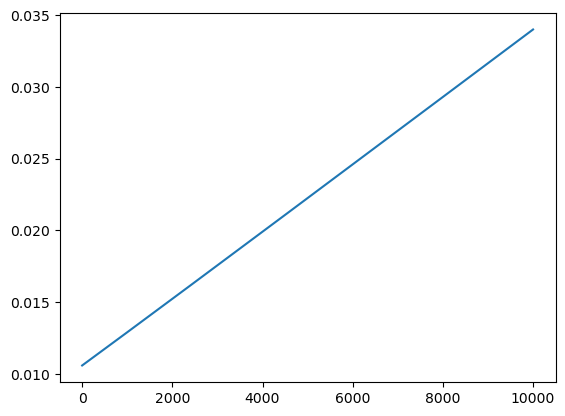

In [511]:
import matplotlib.pyplot as plt

plt.plot(x_list)

In [41]:
import numpy as np
import torch
import pickle

surr_length = 0.5
current = 9.5

test_beam = np.load("Archive/optimization/1000p2_22mev140mrad12kA_optimization.npy")
#[:, :6, 0]

file = open("Archive/pickles/models/model_009_ep81_cpu.pickle", "rb")
model = pickle.load(file)
file.close()
model.requires_grad_(False)

x_list = []
y_list = []

class TransverseParticleDataset(torch.utils.data.Dataset):

    def __init__(self, beam):

        in_mean = [5.361699624411882e-06, 2.8099847552459577e-06, -103.46455517652929, -54.22419067092724, 31384166.415799182, 7.5488486842097995]

        in_std = [0.013987608190429593, 0.01398283932581212, 874752.0124925484, 874453.7368016029, 10528205.536358843, 4.366550900490813]

        x_vector = (beam[:, 0,0] - in_mean[0]) / in_std[0]
        y_vector = (beam[:, 1,0] - in_mean[1]) / in_std[1]
        z_vector = beam[:, 2,0]
        v_x_vector = (beam[:, 3,0] - in_mean[2]) / in_std[2]
        v_y_vector = (beam[:, 4,0] - in_mean[3]) / in_std[3]
        v_z_vector = (beam[:, 5,0] - in_mean[4]) / in_std[4]
        current_temp = (current - in_mean[5]) / in_std[5]
        current_in = np.ones(len(x_vector)) * current_temp
        self.input_tensor = np.array([x_vector, y_vector, v_x_vector, v_y_vector, v_z_vector, current_in])

    def __getitem__(self, idx):

        in_particle = torch.from_numpy(self.input_tensor[:, idx])

        return in_particle.float()

    def __len__(self):
        return len(self.input_tensor[0])
    
    

input_data = TransverseParticleDataset(test_beam)
input_dataloader = torch.utils.data.DataLoader(input_data, batch_size=1000, shuffle=False)

print(input_data.__getitem__(2))


in_mean = [5.361699624411882e-06,
                        2.8099847552459577e-06,
                        -103.46455517652929,
                        -54.22419067092724,
                        31384166.415799182,
                        7.5488486842097995]

out_mean = [1.2208464887686063e-06,
                         6.857339420669208e-06,
                         88.5449769771143,
                         580.5235916625553]

in_std = [0.013987608190429593,
                       0.01398283932581212,
                       874752.0124925484,
                       874453.7368016029,
                       10528205.536358843,
                       4.366550900490813]

out_std = [0.02555778670122864,
                        0.025553795813075042,
                        2215196.2727785874,
                        2214642.635136461]
        
    
data_iter = iter(input_dataloader)
input_batch = next(data_iter)
input_batch.requires_grad_(True)

out_tensor = model(input_batch) 

print(out_tensor)


x_vector_out = out_tensor[:, 0].detach().clone()*out_std[0] + out_mean[0]
y_vector_out = out_tensor[:, 1].clone()*out_std[1] + out_mean[1]
#z_vector_out = torch.ones(len(x_vector), requires_grad=True) * surr_length + z_vector.clone()
v_x_vector_out = out_tensor[:, 2].detach().numpy()*out_std[2] + out_mean[2]
v_y_vector_out = out_tensor[:, 3].detach().numpy()*out_std[3] + out_mean[3]
v_z_vector_out = test_beam[:, 5]

x_temp_out = x_vector_out.detach().numpy()
y_temp_out = y_vector_out.detach().numpy()


tof = 1 / (test_beam[:, 5] / (1 / 1000))
delta_x = tof * v_x_vector_out
delta_y = tof * v_y_vector_out



for indx in range(1000):
    
    #print(np.sqrt(np.mean(x_temp_out**2)))
    x_temp_out += delta_x
    y_temp_out += delta_y
    x_list.append(np.sqrt(np.mean(x_temp_out**2)))
    y_list.append(np.sqrt(np.mean(y_temp_out**2)))
    

    
    

tensor([-3.8332e-04, -2.0096e-04,  3.1890e+00, -2.7946e+00,  9.5629e-01,
         4.4684e-01])
tensor([[-2.0890,  2.1920, -1.3232,  1.7643],
        [ 1.9197,  2.1422,  1.3141,  1.2408],
        [-0.2211, -1.2384, -0.1703, -1.3008],
        ...,
        [-1.1144, -1.2173, -0.9175, -0.6690],
        [ 1.8297,  0.1072,  1.4646,  0.1947],
        [ 0.2522, -1.1518,  0.3023, -0.7052]], grad_fn=<AddmmBackward0>)


ValueError: operands could not be broadcast together with shapes (1000,55) (1000,) 

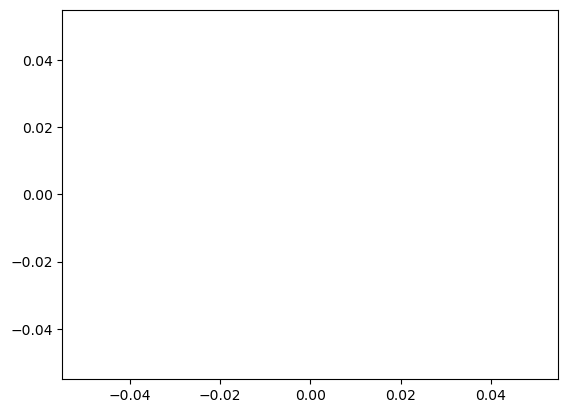

In [35]:
import matplotlib.pyplot as plt

plt.plot(x_list)

#print(max(x_list))

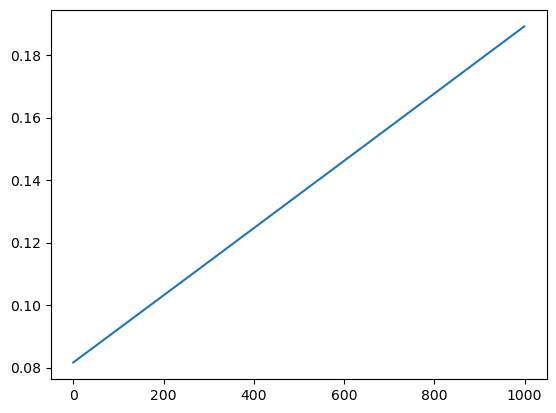

In [23]:
plt.plot(y_list)

In [526]:

test_tensor_0 = torch.tensor([0, 1, 2, 4, 5])
test_tensor_1 = torch.tensor([6, 7, 8, 9, 0])

test_tensor_2 = torch.stack([test_tensor_0, test_tensor_1])

test_tensor_3 = test_tensor_2[:,3]

test_tensor_4 = torch.sin(test_tensor_3)


test_tensor_5 = torch.cat([test_tensor_2[:, :3], torch.transpose(torch.unsqueeze(test_tensor_4, 0),0,1), 
                           torch.transpose(torch.unsqueeze(test_tensor_2[:,4],0), 0, 1)],1)

print(test_tensor_5)


tensor([[0, 1, 2],
        [6, 7, 8]])
tensor([[-0.7568,  0.4121]])
tensor([[5, 0]])
tensor([[ 0.0000,  1.0000,  2.0000, -0.7568,  5.0000],
        [ 6.0000,  7.0000,  8.0000,  0.4121,  0.0000]])
